In [1]:
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from datetime import datetime, timedelta
import time as time_lib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import gaussian_kde
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error, mean_squared_error

color0 = '#000000'
color1 = '#43519B'
color2 = '#7180D3'
color3 = '#C13557'
color4 = '#D37189'
color5 = '#018539'
color6 = '#50CD85'

sns.set(style="whitegrid")

In [2]:
def eva_table(df, name_model, base = 'I',):
    data = []
    dfnoon = df[(df.index.hour > 10) & (df.index.hour <=14)]
    dfnonnoon = df[~((df.index.hour > 10) & (df.index.hour <=14))]
    for i in range(len(name_model)):
        
        MAE= mean_absolute_error(df[base],df[name_model[i]])
        RMSE = np.sqrt(mean_squared_error(df[base],df[name_model[i]]))
        noon_MAE = mean_absolute_error(dfnoon[base],dfnoon[name_model[i]])
        noon_RMSE = np.sqrt(mean_squared_error(dfnoon[base],dfnoon[name_model[i]]))
        non_noon_MAE = mean_absolute_error(dfnonnoon[base],dfnonnoon[name_model[i]])
        non_noon_RMSE = np.sqrt(mean_squared_error(dfnonnoon[base],dfnonnoon[name_model[i]]))
        
        data.append({'Overall MAE':MAE, 'Overall RMSE':RMSE, 'MAE at noon':noon_MAE, 'RMSE at noon':noon_RMSE,
                    'MAE at non-noon':non_noon_MAE, 'RMSE at non-noon':non_noon_RMSE})
    df = pd.DataFrame(data)
    df.index = name_model
    return df

def group_table(df, name_model, base = 'I', score = 'MAE', by = None):
    dfh = df[['site_name',base]].copy()
    if by == None:
        by = [dfh.index.hour]

    if score == 'MAE':
        for i in range(len(name_model)):
            dfh[name_model[i]] = abs(df[base]-df[name_model[i]])
        return dfh.groupby(by=by).mean().reset_index()
    else:
        for i in range(len(name_model)):
            dfh[name_model[i]] = abs(df[base]-df[name_model[i]])**2
        return np.sqrt(dfh.groupby(by=by).mean()).reset_index()

In [5]:
FOLDER_MODEL = '/Users/khunnoot/Desktop/predict_irradiance/trainning/model'
result_model = 'compare_model_result.csv'

compare = pd.read_csv(os.path.join(FOLDER_MODEL,result_model), parse_dates = ['Datetime'], index_col = ['Datetime'])
compare.head(5)

,site_name,I,OLS,poly,yXGB,yRF,CNN
Datetime,,,,,,,
2023-02-07 08:00:00+07:00,ISL001,110.3633,172.252600,138.025779,210.43910,176.293929,141.61853
2023-02-07 08:30:00+07:00,ISL001,208.3990,313.599855,260.070233,255.95995,281.717812,260.48743
2023-02-07 09:00:00+07:00,ISL001,437.6490,400.084434,353.791449,374.97723,381.972205,376.27963
2023-02-07 09:30:00+07:00,ISL001,496.7265,445.340109,416.610174,447.58650,432.071115,479.64917
2023-02-07 10:00:00+07:00,ISL001,482.6430,547.806455,519.840215,549.73126,506.853844,575.12860


In [10]:
name_model = ['OLS','poly','yXGB', 'yRF', 'CNN']
eva_table(compare, name_model, base = 'I').round(3).iloc[:,[0,2,3,4,5]]

,Overall MAE,MAE at noon,RMSE at noon,MAE at non-noon,RMSE at non-noon
OLS,97.570,114.527,158.591,82.918,117.303
poly,95.160,108.387,159.110,83.731,116.925
yXGB,93.740,112.387,160.704,77.628,113.377
yRF,89.351,105.231,151.952,75.629,111.231
CNN,96.475,115.013,171.555,80.457,116.343


In [12]:
name_model = ['OLS','poly','yXGB', 'yRF', 'CNN']
q = group_table(compare, name_model, base = 'I').drop(columns=['I'])
q

/var/folders/k4/2flb1pz9447c85n88k4_n8jm0000gn/T/ipykernel_88244/2697616471.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return dfh.groupby(by=by).mean().reset_index()


,Datetime,OLS,poly,yXGB,yRF,CNN
0,8,58.851355,64.528238,55.896873,53.070637,62.078084
1,9,76.975262,84.753061,77.125918,74.365507,76.876231
2,10,98.541353,100.278937,88.663554,89.485876,92.867287
3,11,113.508908,104.954601,104.103789,101.541208,104.894247
4,12,120.282681,106.696109,120.629107,105.411056,117.524503
5,13,116.634925,111.092136,114.467946,109.183757,119.240115
6,14,107.226819,110.914765,110.004947,104.719212,118.398774
7,15,89.634940,87.496973,88.091047,85.963156,91.846031
8,16,94.623672,77.597312,76.912420,72.588056,74.884252


Text(0.5, 1.0, 'Hourly MAE of 5 models')

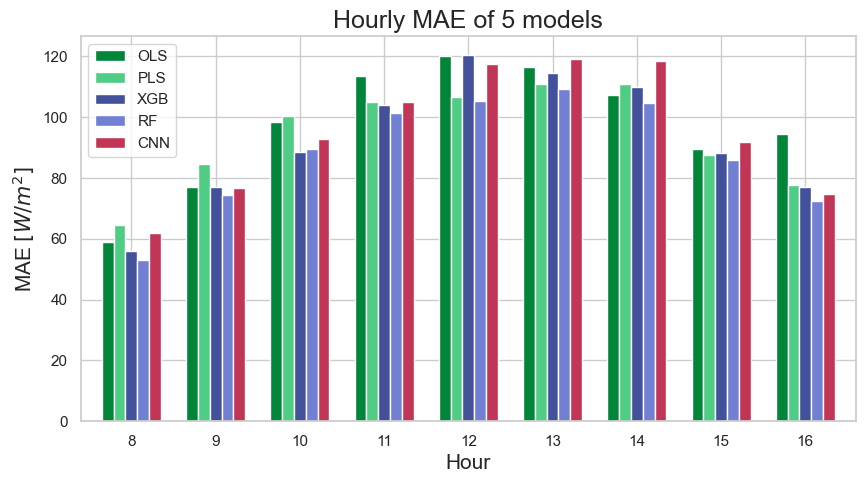

In [14]:
sns.set(style="whitegrid")
color1 = '#43519B'
color2 = '#7180D3'
color3='#C13557'
color4 = '#D37189'
color5 = '#018539'
label = ['OLS','PLS','XGB','RF','CNN']
ax= q.plot(x='Datetime', y=name_model, kind="bar",color=[color5, color6, color1,color2,color3,color4],label=label, rot=0,width=0.7,figsize=(10,5))

plt.xlabel('Hour',fontsize=15)
plt.ylabel(r'MAE $[W/m^2]$',fontsize=15)
plt.title('Hourly MAE of 5 models',fontsize=18)

In [15]:
compare.head(5)

,site_name,I,OLS,poly,yXGB,yRF,CNN
Datetime,,,,,,,
2023-02-07 08:00:00+07:00,ISL001,110.3633,172.252600,138.025779,210.43910,176.293929,141.61853
2023-02-07 08:30:00+07:00,ISL001,208.3990,313.599855,260.070233,255.95995,281.717812,260.48743
2023-02-07 09:00:00+07:00,ISL001,437.6490,400.084434,353.791449,374.97723,381.972205,376.27963
2023-02-07 09:30:00+07:00,ISL001,496.7265,445.340109,416.610174,447.58650,432.071115,479.64917
2023-02-07 10:00:00+07:00,ISL001,482.6430,547.806455,519.840215,549.73126,506.853844,575.12860


In [16]:
q = compare.copy()
q = q.groupby(by= [q.index.date,'site_name']).mean()
q.reset_index(inplace=True)
date = [str(d) for d in q.level_0.to_list()]
site = q.site_name.to_list()

/var/folders/k4/2flb1pz9447c85n88k4_n8jm0000gn/T/ipykernel_88244/2816378391.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[k].set_xticklabels(['08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00']);


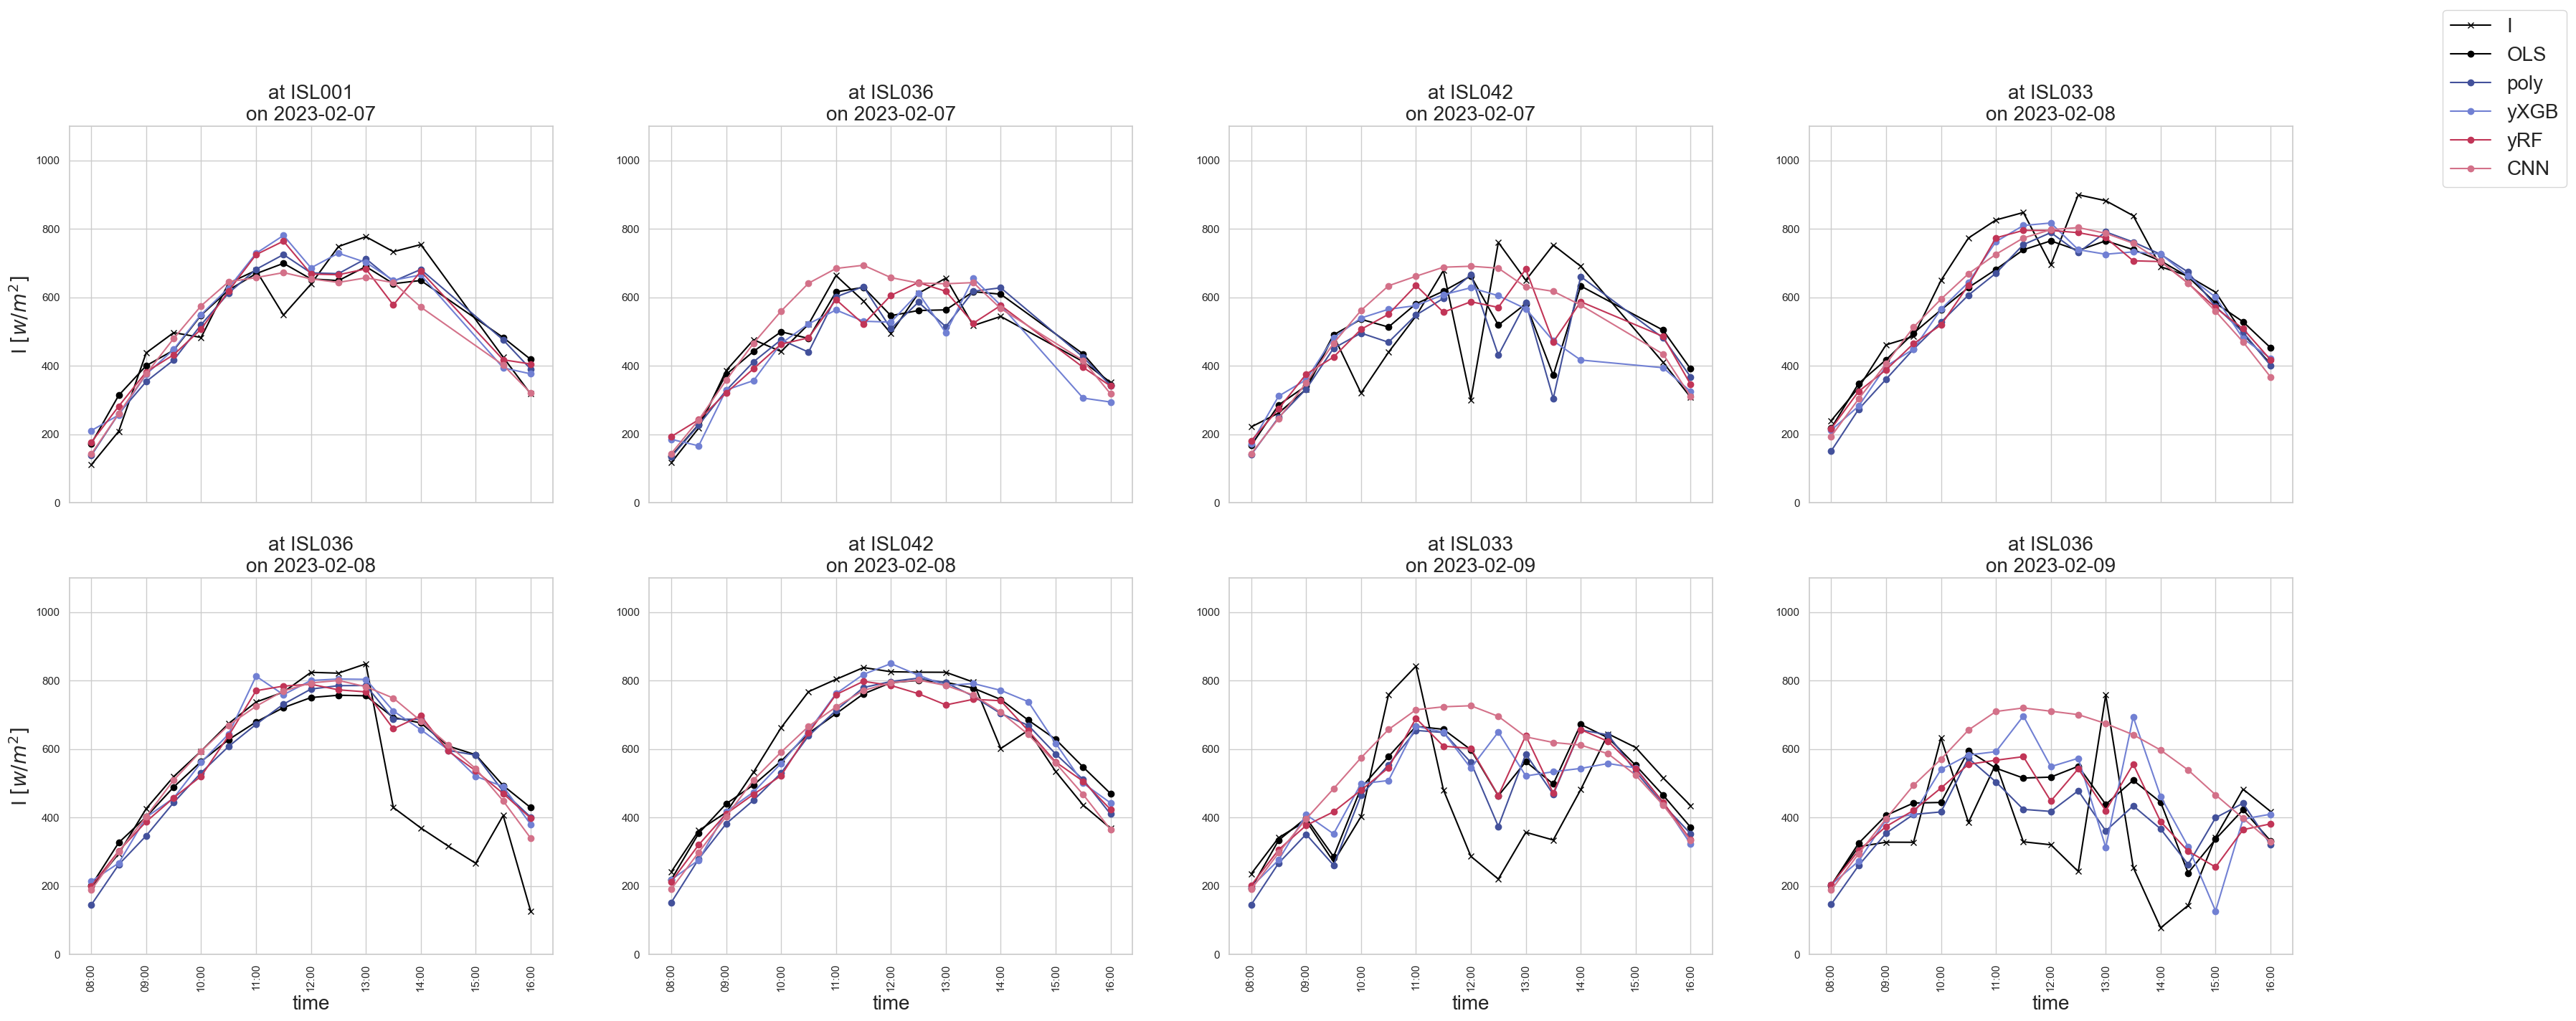

In [36]:
#show the samples predicted irradiance and actual irradiance
nrow= 2
ncol = 4
name_model = ['OLS','poly','yXGB','yRF','CNN']
color=[color0, color1, color2, color3, color4]

####################################
fig,ax=plt.subplots(nrow,ncol, figsize=(40,15))
ax = ax.reshape(1,-1)[0]
for k in range(len(ax)):
    plt.subplot(nrow,ncol,k+1)
    ee1 = compare[compare.site_name==site[k]].loc[date[k]]
    l1=plt.plot(ee1.I,'-x',color='black')
    for e in range(len(name_model)):
        l2 = plt.plot(ee1[name_model[e]],'-o',color=color[e])
    
    if k%4 == 0:
        plt.ylabel(r'I $[w/m^2]$',fontsize=20)
    plt.xticks(rotation = 'vertical');
    plt.title('at ' +site[k]+ '\non '+date[k],fontsize=20)
    if k >= nrow*ncol-4:
        ax[k].set_xticklabels(['08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00']);
        plt.xlabel('time',fontsize=20)
    else :
        ax[k].set_xticklabels([]);
    ax[k].set_ylim(0,1100)

fig.legend(labels=['I']+name_model,loc="upper right",fontsize=20);